In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings

In [2]:
warnings.filterwarnings("ignore")

## Load the dataset

In [3]:
#df_all = pd.read_csv("book_rec/Books.csv")
df_all = pd.read_csv("/kaggle/input/book-recommendation-dataset/Books.csv")

In [4]:
df_all.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
df_all.shape

(271360, 8)

In [6]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
df = df_all.iloc[:100000, :]

In [8]:
df.shape

(100000, 8)

In [9]:
df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,100000,100000,100000,100000,100000,100000,100000,100000
unique,100000,90907,41997,90,7862,99944,99944,99944
top,0451410106,Wuthering Heights,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/055299619X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/055337849X.0...
freq,1,13,322,7119,3135,2,2,2


In [10]:
df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [11]:
len(df["Book-Title"].unique())

90907

In [12]:
len(df["Book-Author"].unique())

41997

In [13]:
len(df["Publisher"].unique())

7862

In [14]:
book_rating_all = pd.read_csv("/kaggle/input/book-recommendation-dataset/Ratings.csv")
book_users_all = pd.read_csv("/kaggle/input/book-recommendation-dataset/Users.csv")

In [15]:
book_rating = book_rating_all.iloc[:100000, :]
book_users = book_users_all.iloc[:100000, :]

In [16]:
book_rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [17]:
book_rating.shape

(100000, 3)

In [18]:
book_users.shape

(100000, 3)

In [19]:
book_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [20]:
book_users.isnull().sum()

User-ID         0
Location        0
Age         39731
dtype: int64

In [21]:
book_rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [22]:
book_ratings = book_rating.iloc[:, 0:3]

In [23]:
book_ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
99995,23288,0802448089,0
99996,23288,0802448151,0
99997,23288,0802448267,0
99998,23288,0802457010,0


In [24]:
df.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [25]:
book_ratings.rename(columns={"User-ID" : "user_id", "Book-Rating" : "book_rating"}, inplace=True)

In [26]:
book_ratings.head()

,user_id,ISBN,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [27]:
df = pd.merge(df, book_ratings, on="ISBN")

In [28]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,user_id,book_rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0


In [29]:
df = df.reindex(columns=["ISBN", "user_id", "Book-Title", "Book-Author", "Year-Of-Publication", "Publisher", "book_rating", "Image-URL-S", "Image-URL-M", "Image-URL-L"])

In [30]:
df.head()

,ISBN,user_id,Book-Title,Book-Author,Year-Of-Publication,Publisher,book_rating,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,2,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,5,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0002005018,11400,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,0002005018,11676,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,0060973129,8,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,0,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [31]:
df.groupby("Book-Title").mean()["book_rating"].sort_values(ascending=False)

Book-Title
Daughters of Copper Woman                                                                                     10.0
The Howling                                                                                                   10.0
Messages from the Masters : Tapping into the Power of Love                                                    10.0
Errors in English and Ways to Correct Them : Fourth Edition                                                   10.0
Idiot Letters: One Man's Relentless Assault on Corporate America                                              10.0
                                                                                                              ... 
Only in Your Arms                                                                                              0.0
Only the Beginning                                                                                             0.0
Only the Heart (Uqp)                                                 

In [32]:
df.groupby("Book-Title").count()["book_rating"].sort_values(ascending=False)

Book-Title
Wild Animus                                                                                                   197
The Lovely Bones: A Novel                                                                                     107
The Secret Life of Bees                                                                                        78
The Da Vinci Code                                                                                              76
Life of Pi                                                                                                     71
                                                                                                             ... 
Reflections on Diabetes (Diabetes Forecast Book)                                                                1
Reflections on a Marine Venus: A Companion to the Landscape of Rhodes                                           1
Reforming a Rake : With This Ring (With This Ring, 1)                        

In [33]:
ratings = pd.DataFrame(df.groupby("Book-Title").mean()["book_rating"])

In [34]:
ratings.head()

,book_rating
Book-Title,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",0.0
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.0
It Takes Two,0.0
"Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)",0.0
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),0.0


In [35]:
ratings.shape

(41435, 1)

In [36]:
ratings.describe()

,book_rating
count,41435.000000
mean,3.069386
std,3.509478
min,0.000000
25%,0.000000
50%,1.333333
75%,6.000000
max,10.000000


In [37]:
ratings["num_of_ratings"] = pd.DataFrame(df.groupby("Book-Title").count()["book_rating"])

In [38]:
ratings.head()

,book_rating,num_of_ratings
Book-Title,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",0.0,1
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.0,1
It Takes Two,0.0,1
"Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)",0.0,1
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),0.0,1


In [39]:
ratings.sort_values(by="book_rating")

,book_rating,num_of_ratings
Book-Title,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",0.0,1
Oogie Boogie Central,0.0,1
Only the Heart (Uqp),0.0,1
Only the Beginning,0.0,1
Only in Your Arms,0.0,1
...,...,...
Idiot Letters: One Man's Relentless Assault on Corporate America,10.0,1
Errors in English and Ways to Correct Them : Fourth Edition,10.0,1
Messages from the Masters : Tapping into the Power of Love,10.0,1


In [40]:
ratings.sort_values(by="book_rating", ascending=False)

,book_rating,num_of_ratings
Book-Title,,
Lake Powell: A Different Light,10.0,1
"Cardcaptor Sakura: Master of the Clow (Cardcaptor Sakura, 3)",10.0,1
"Cardcaptor Sakura: Master of the Clow, Book 4",10.0,1
"Cardcaptor Sakura: Master of the Clow, Book 5",10.0,1
Uncle John's All-Purpose Extra-Strength Bathroom Reader (Uncle John's Bathroom Reader #13),10.0,1
...,...,...
Lonely On the Mountain,0.0,1
Lonely Girls With Burning Eyes: A Wife Recalls Her Husband's Journey Home from Vietnam,0.0,1
Lone Wolf (Stocking Stuffers) (Stolen Moments),0.0,2


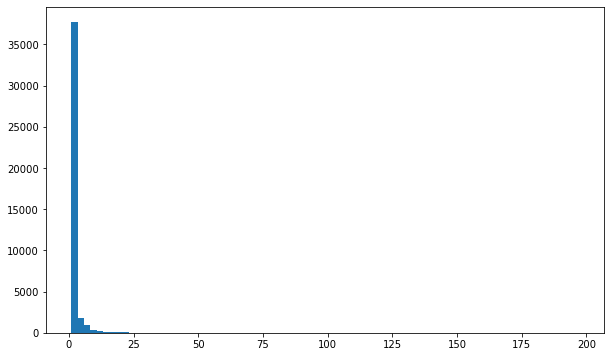

In [41]:
plt.figure(figsize=(10, 6))

plt.hist(ratings.num_of_ratings, bins=80)
plt.show()

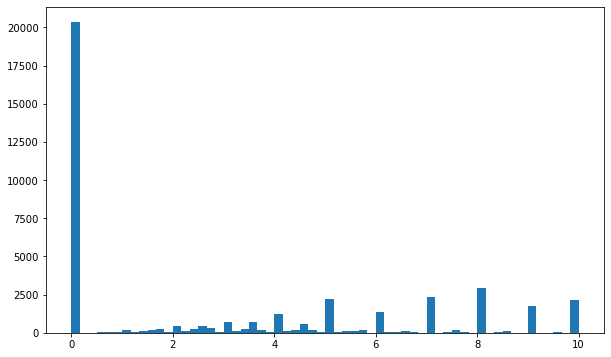

In [42]:
plt.figure(figsize=(10,6))
plt.hist(ratings.book_rating, bins=60)
plt.show()

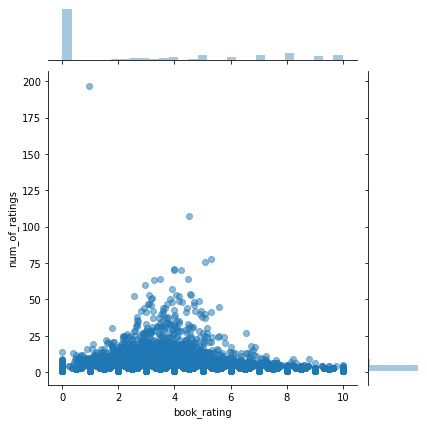

In [43]:
sns.jointplot(x="book_rating", y="num_of_ratings", data=ratings, alpha=0.5)
plt.show()

In [44]:
df.head()

,ISBN,user_id,Book-Title,Book-Author,Year-Of-Publication,Publisher,book_rating,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,2,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,5,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0002005018,11400,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,0002005018,11676,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,0060973129,8,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,0,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [45]:
book_matrix = df.pivot_table(index="user_id", columns="Book-Title", values="book_rating")

In [46]:
book_matrix

Book-Title,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",Beyond IBM: Leadership Marketing and Finance for the 1990s,It Takes Two,"Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)",Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),"Q-Space (Star Trek The Next Generation, Book 47)",Tales of Terror and Suspense,$oft Money: The True Power in Our Nation's Capital,"' Sie belieben wohl zu scherzen, Mr. Feynman.'. Abenteuer eines neugierigen Physikers.",' Small g'. Eine Sommeridylle.,...,seaQuest 2,stardust,the Heiress Bride (sister brides),"wet sand, raven tracks",why I'm like this : True Stories,"Â¡Corre, perro, corre!",Â¿QuiÃ©n se ha llevado mi queso?,"Â¿QuÃ© me quieres, amor?",Ã?Â?ber die Freiheit.,Ã?Â?bermorgen.
user_id,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
book_matrix.shape

(8008, 41435)

In [48]:
ratings

,book_rating,num_of_ratings
Book-Title,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",0.0,1
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.0,1
It Takes Two,0.0,1
"Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)",0.0,1
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),0.0,1
...,...,...
"Â¡Corre, perro, corre!",10.0,1
Â¿QuiÃ©n se ha llevado mi queso?,7.0,1
"Â¿QuÃ© me quieres, amor?",3.0,2


In [49]:
ratings.sort_values("num_of_ratings", ascending=False)

,book_rating,num_of_ratings
Book-Title,,
Wild Animus,0.954315,197
The Lovely Bones: A Novel,4.504673,107
The Secret Life of Bees,5.294872,78
The Da Vinci Code,5.078947,76
Life of Pi,3.985915,71
...,...,...
Jennie,9.000000,1
Jenetta,0.000000,1
Jemima J.,0.000000,1


In [50]:
davinci_code_ratings = book_matrix["The Da Vinci Code"]

In [51]:
davinci_code_ratings.head()

user_id
2    NaN
8    NaN
9    NaN
10   NaN
12   NaN
Name: The Da Vinci Code, dtype: float64

In [52]:
similar_to_davinci = book_matrix.corrwith(davinci_code_ratings)

In [53]:
similar_to_davinci

Book-Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)   NaN
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                  NaN
 It Takes Two                                                                                                NaN
 Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)                                            NaN
 Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback))                                           NaN
                                                                                                              ..
Â¡Corre, perro, corre!                                                                                       NaN
Â¿QuiÃ©n se ha llevado mi queso?                                                                             NaN
Â¿QuÃ© me quieres, amor?                                                             

In [54]:
corr_of_davinci = pd.DataFrame(similar_to_davinci, columns=["Correlation"])

In [55]:
corr_of_davinci.head()

,Correlation
Book-Title,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",NaN
Beyond IBM: Leadership Marketing and Finance for the 1990s,NaN
It Takes Two,NaN
"Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)",NaN
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),NaN


In [56]:
corr_of_davinci.isnull().sum()

Correlation    39579
dtype: int64

In [57]:
corr_of_davinci.dropna(inplace=True)

In [58]:
corr_of_davinci.isnull().sum()

Correlation    0
dtype: int64

In [59]:
corr_of_davinci.head()

,Correlation
Book-Title,
...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,1.000000
"1,401 More Things That P*Ss Me Off",1.000000
1984,1.000000
1st to Die: A Novel,0.500342
24 Hours,-1.000000


In [60]:
corr_of_davinci.sort_values("Correlation", ascending=False).head()

,Correlation
Book-Title,
Sons of Fortune (Ay Adult - Archer),1.0
City of Bones,1.0
One Thousand Paper Cranes: The Story of Sadako and the Children's Peace Statue,1.0
Out of Sight,1.0
Outsider,1.0


In [61]:
corr_davinci = corr_of_davinci.join(ratings["num_of_ratings"])

In [62]:
corr_davinci.head()

,Correlation,num_of_ratings
Book-Title,,
...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,1.000000,2
"1,401 More Things That P*Ss Me Off",1.000000,2
1984,1.000000,25
1st to Die: A Novel,0.500342,37
24 Hours,-1.000000,8


In [63]:
corr_davinci[corr_davinci.num_of_ratings > 50].sort_values("Correlation", ascending=False)

,Correlation,num_of_ratings
Book-Title,,
The Da Vinci Code,1.000000,76
The Client,0.739153,51
The Pelican Brief,0.702524,60
The Nanny Diaries: A Novel,0.633792,70
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),0.575758,53
House of Sand and Fog,0.505445,53
The Testament,0.495832,52
Bridget Jones's Diary,0.468948,63
The Red Tent (Bestselling Backlist),0.363681,64


## Predict Books

In [64]:
def predictBooks(book_name):
    book_user_ratings = book_matrix[book_name]
    similar_to_book_name = book_matrix.corrwith(book_user_ratings)
    
    corr_book_name = pd.DataFrame(similar_to_book_name, columns=["Correlation"])
    corr_book_name.dropna(inplace=True)
    
    corr_user_book = corr_book_name.join(ratings["num_of_ratings"])
    predictions = corr_user_book[corr_user_book.num_of_ratings > 50].sort_values("Correlation", ascending=False)
    
    return predictions

In [65]:
predictBooks("Life of Pi")

,Correlation,num_of_ratings
Book-Title,,
Life of Pi,1.000000,71
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),0.987878,53
The Client,0.726184,51
Summer Sisters,0.705996,52
The Secret Life of Bees,0.559739,78
White Oleander : A Novel,0.554736,53
The Nanny Diaries: A Novel,0.523808,70
The Lovely Bones: A Novel,0.454988,107
Where the Heart Is (Oprah's Book Club (Paperback)),0.396642,54
